In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [118]:
job="support_engineer"
df=pd.read_csv(f"../separated_jobs/{job}.csv")

In [119]:
df.head()

,company_name,job_role,job_location,salary_pa,skills,company_rating,standardized_job_role
0,Bosch Group,Backend Developer-Support Engineer,Telangana,0.0,".NET, SQL, PostgreSQL",4.1,Support Engineer
1,AlphaSense India,Customer & Product Support Analyst,Pune,700000.0,"Analysis skills, AI, Communication skills, Tim...",3.8,Support Engineer
2,AlphaSense,Customer & Product Support Analyst,Pune,700000.0,"Analysis skills, AI, Communication skills, Tim...",3.8,Support Engineer
3,Barclays,Application Support Analyst,Pune,750000.0,"Oracle, Business intelligence, SAS, DB2, Micro...",3.9,Support Engineer
4,CIRCOR,IT Support Analyst,Coimbatore,4200000.0,"ERP systems, Network infrastructure, Project m...",3.7,Support Engineer


In [120]:
df.isnull().sum()

company_name               0
job_role                   0
job_location               0
salary_pa                  0
skills                    12
company_rating           245
standardized_job_role      0
dtype: int64

In [121]:
df['salary_pa'] = df['salary_pa'].astype(float) / 100000
df.rename(columns = {'salary_pa':'salary_lpa'}, inplace = True)

In [122]:
df[df['salary_lpa'] == 0]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,Bosch Group,Backend Developer-Support Engineer,Telangana,0.0,".NET, SQL, PostgreSQL",4.1,Support Engineer
5,NTT DATA,IT Support Analyst,India,0.0,"Spanish, SAP, English, SQL, AWS",3.8,Support Engineer
8,Kinaxis Inc.,"Manager, Customer Support - Analytics",India,0.0,"Management, Customer service, Supply chain, Wi...",4.0,Support Engineer
14,ASWAT,L1 Support Engineer,Remote,0.0,"English, VoIP, IT support, Computer networking...",NaN,Support Engineer
15,Stacknize Solution LLP,Application Support Engineer Intern,Remote,0.0,"Software troubleshooting, Business analysis, J...",NaN,Support Engineer
...,...,...,...,...,...,...,...
617,Accenture,Application Support Engineer,Coimbatore,0.0,"Azure, Incident management, Software troublesh...",3.8,Support Engineer
620,Accenture,Technology Support Engineer,Coimbatore,0.0,"Microsoft Powerpoint, CI/CD, System administra...",3.8,Support Engineer
624,Orbit & Skyline,Senior Product Support Engineer,Mohali,0.0,"Image processing, Software troubleshooting, Co...",4.0,Support Engineer
631,Growen,JUNIOR SOFTWARE SUPPORT ENGINEER,Calicut,0.0,"Microsoft SQL Server, SQL, Communication skills",NaN,Support Engineer


### Filling the null values by replacing with average salary of company rating

In [124]:
df['company_rating'] = df['company_rating'].fillna(0)
df["salary_lpa"]=df.salary_lpa.fillna(0)
avg_salary_by_rating = df[df['salary_lpa'] > 0].groupby('company_rating')['salary_lpa'].mean()


In [125]:
def map_with_nearest_rating(row, avg_salary_by_rating):
    if row['salary_lpa'] == 0:  # Check if salary is 0
        rating = row['company_rating']
        if rating in avg_salary_by_rating:  # If exact match exists
            return avg_salary_by_rating[rating]
        else:  # Find the closest rating
            nearest_rating = min(avg_salary_by_rating.keys(), key=lambda x: abs(x - rating))
            return avg_salary_by_rating[nearest_rating]
    return row['salary_lpa']  # If salary isn't 0, return the original value

# Apply the function to the DataFrame
df['salary_lpa'] = df.apply(lambda row: map_with_nearest_rating(row, avg_salary_by_rating), axis=1)


In [126]:
df

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,Bosch Group,Backend Developer-Support Engineer,Telangana,19.774000,".NET, SQL, PostgreSQL",4.1,Support Engineer
1,AlphaSense India,Customer & Product Support Analyst,Pune,7.000000,"Analysis skills, AI, Communication skills, Tim...",3.8,Support Engineer
2,AlphaSense,Customer & Product Support Analyst,Pune,7.000000,"Analysis skills, AI, Communication skills, Tim...",3.8,Support Engineer
3,Barclays,Application Support Analyst,Pune,7.500000,"Oracle, Business intelligence, SAS, DB2, Micro...",3.9,Support Engineer
4,CIRCOR,IT Support Analyst,Coimbatore,42.000000,"ERP systems, Network infrastructure, Project m...",3.7,Support Engineer
...,...,...,...,...,...,...,...
628,CARE INFOTECH,Software Support Engineer,Hyderābād,1.800000,"Software troubleshooting, Windows, .NET, Java,...",0.0,Support Engineer
629,Reliable Software Systems Pvt Ltd,Software Support Engineer,Mumbai,48.000000,Communication skills,3.8,Support Engineer
630,Esko,Software Support Engineer - Solutions Support,Bengaluru,6.500000,"English, IT support",3.3,Support Engineer
631,Growen,JUNIOR SOFTWARE SUPPORT ENGINEER,Calicut,4.073036,"Microsoft SQL Server, SQL, Communication skills",0.0,Support Engineer


In [127]:
df[df.salary_lpa.isnull()]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role


In [128]:
df.describe()

,salary_lpa,company_rating
count,633.000000,633.000000
mean,11.317619,2.334755
std,12.491892,1.908797
min,0.480000,0.000000
25%,3.600000,0.000000
50%,5.500000,3.400000
75%,13.993444,3.900000
max,48.000000,5.000000


In [129]:
df.nunique()

company_name             552
job_role                 322
job_location              66
salary_lpa               118
skills                   563
company_rating            28
standardized_job_role      1
dtype: int64

In [130]:
df.to_csv(f"../joining_data/{job}.csv",index=False)

### Analyzing the skills required for Backend jobs

In [132]:

df['skills'] = df['skills'].str.lower().str.split(', ')  


all_skills = [skill for sublist in df['skills'].dropna() for skill in sublist]


In [133]:
from collections import Counter


skill_counts = Counter(all_skills)


skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])


skill_df = skill_df.sort_values(by='Count', ascending=False)
print(skill_df)


                        Skill  Count
51   software troubleshooting    238
26          technical support    231
19                    english    161
31           microsoft office    123
30                    windows    115
..                        ...    ...
180                    arabic      1
29               supply chain      1
177                    filing      1
176        account management      1
299           computer vision      1

[300 rows x 2 columns]


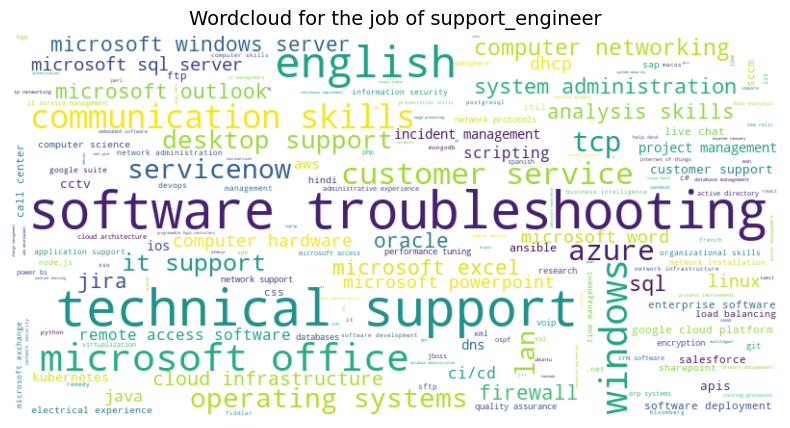

In [134]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f"Wordcloud for the job of {job}", fontsize=14)  
plt.axis("off")
plt.show()


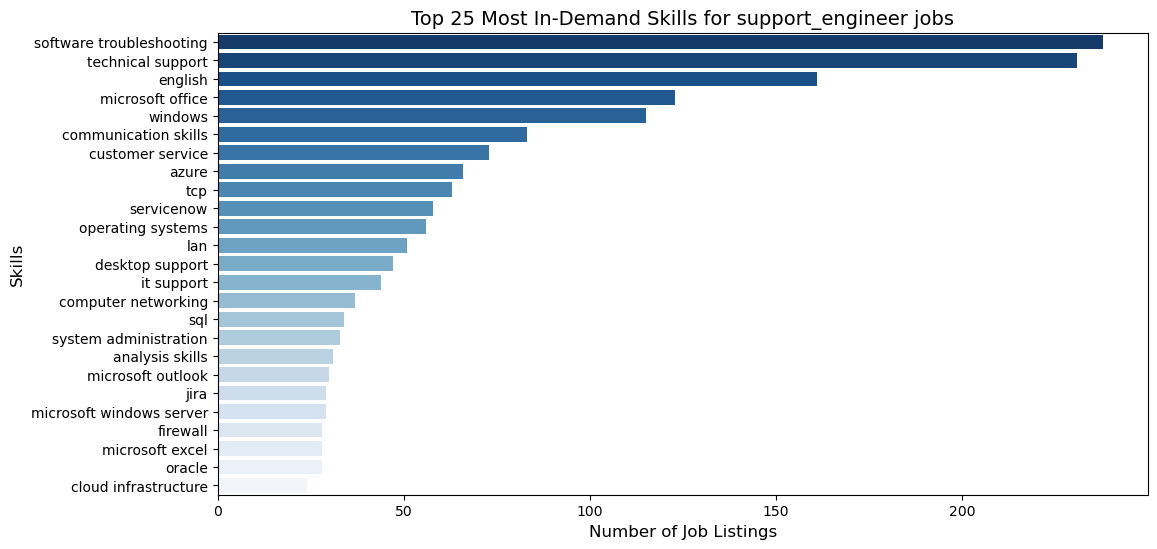

In [135]:
top_skills = skill_df.head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills['Count'], y=top_skills['Skill'], palette="Blues_r")

plt.title(f"Top 25 Most In-Demand Skills for {job} jobs", fontsize=14)
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.show()


### Company vs Salary

In [137]:
top_companies = df.groupby('company_name')['salary_lpa'].mean().reset_index()


top_companies = top_companies.sort_values(by='salary_lpa', ascending=False)


print(top_companies.head(10))


                   company_name  salary_lpa
210           Ikigai Labs, Inc.        48.0
142                   Docsvault        48.0
539                 iTDAY India        48.0
309                  Next Order        48.0
247                   Lambsrock        48.0
488  Variman Global Enterprises        48.0
241                  KocharTech        48.0
262           Macro Global (MG)        48.0
477                   UPS India        48.0
236                     Kapture        48.0


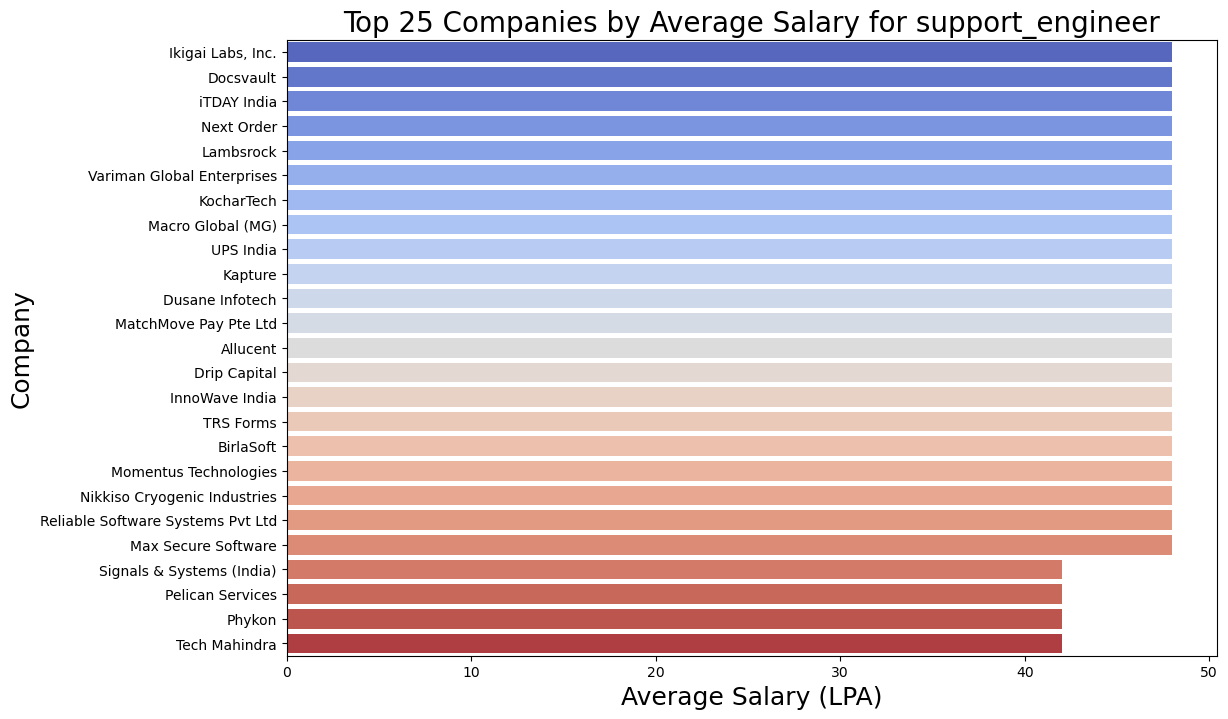

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt


top_10 = top_companies.head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10['salary_lpa'], y=top_10['company_name'], palette="coolwarm")

plt.title(f"Top 25 Companies by Average Salary for {job}", fontsize=20)
plt.xlabel("Average Salary (LPA)", fontsize=18)
plt.ylabel("Company", fontsize=18)
plt.show()


### Location Vs Salary

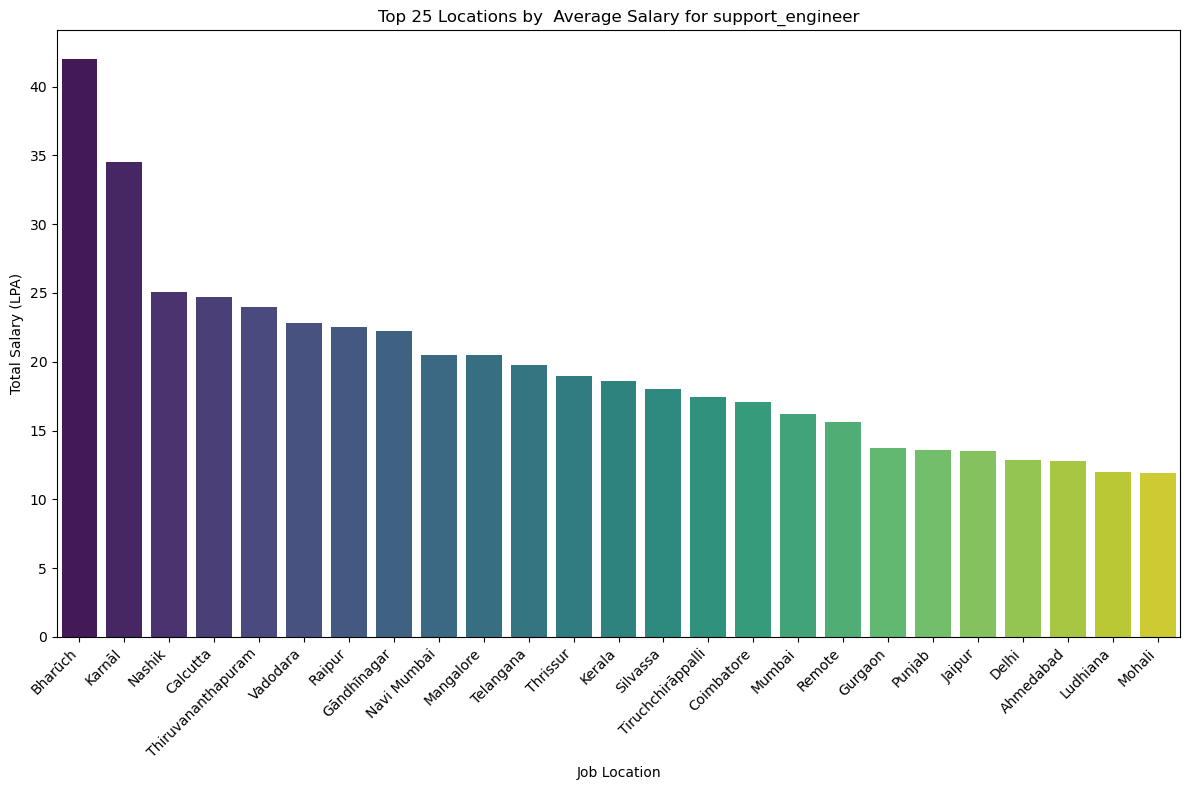

In [140]:
salary_by_location = df.groupby('job_location')['salary_lpa'].mean()


top_locations = salary_by_location.sort_values(ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Total Salary (LPA)')
plt.title(f'Top 25 Locations by  Average Salary for {job}')

plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

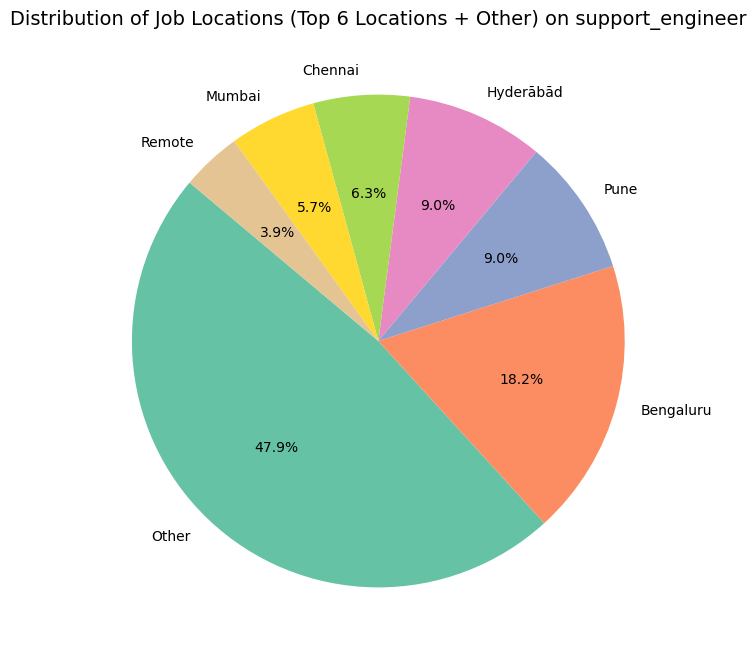

In [141]:
# Calculate the frequency of each location, excluding 'India'
location_counts = df[df['job_location'] != 'India']['job_location'].value_counts()

# Get the top 6 most frequent locations
top_locations = location_counts.head(6).index

# Group 'India' and other locations as 'Other'
df['job_location_grouped'] = df['job_location'].apply(lambda x: x if x in top_locations else 'Other')

# Calculate the frequency of the grouped locations
location_grouped_counts = df['job_location_grouped'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_grouped_counts, labels=location_grouped_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(location_grouped_counts)))

# Set the title
plt.title(f"Distribution of Job Locations (Top 6 Locations + Other) on {job}", fontsize=14)

# Show the pie chart
plt.show()

### Role vs Salary

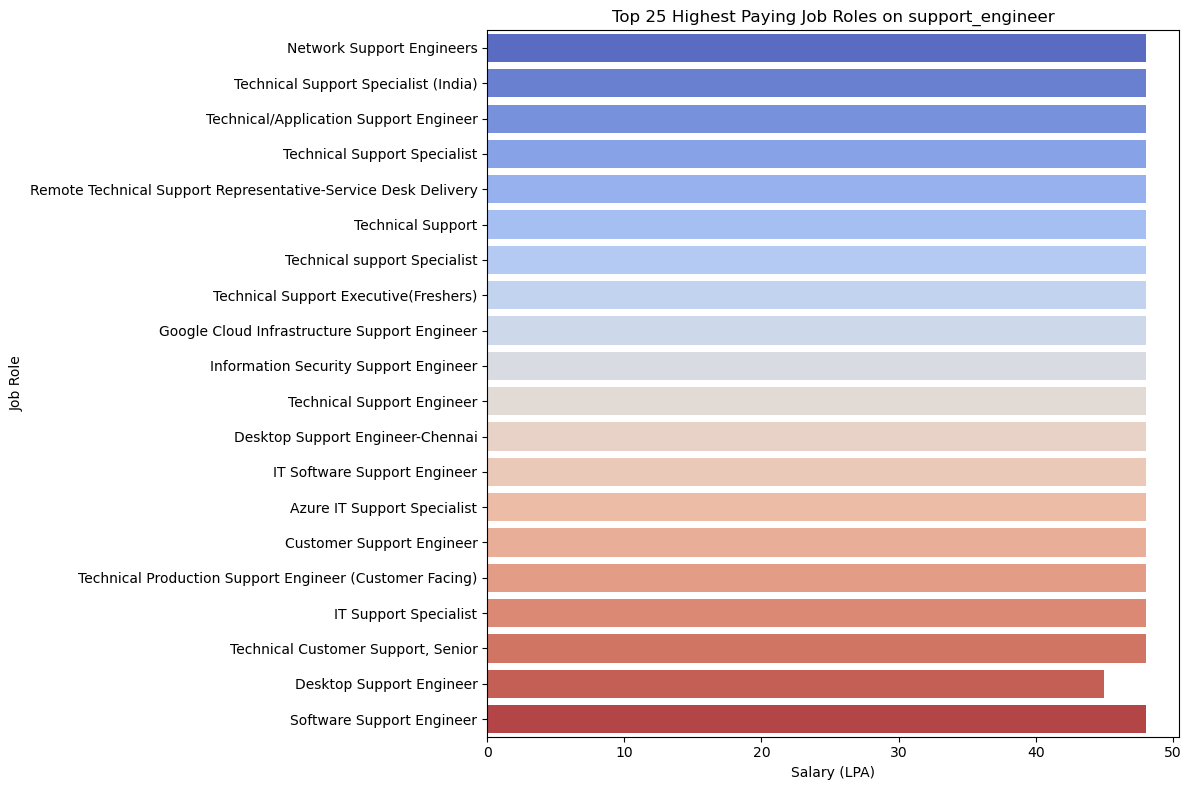

In [143]:
top_roles_by_salary = df[['job_role', 'salary_lpa']].sort_values(by='salary_lpa', ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x='salary_lpa', y='job_role', data=top_roles_by_salary, palette='coolwarm',errorbar=None)


plt.xlabel('Salary (LPA)')
plt.ylabel('Job Role')
plt.title(f'Top 25 Highest Paying Job Roles on {job}')


plt.tight_layout()
plt.show()

### Skills VS Salary

In [145]:
df_skills=df.explode("skills")
# Calculate the frequency of each skill
skill_counts = df_skills['skills'].value_counts()

# Get the top 10 most frequent skills
top_skills = skill_counts.head(10).index

# Filter the DataFrame to keep only rows with the top 10 skills
df_top_skills = df_skills[df_skills['skills'].isin(top_skills)]


C:\Users\Asus\AppData\Local\Temp\ipykernel_13136\2309435469.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


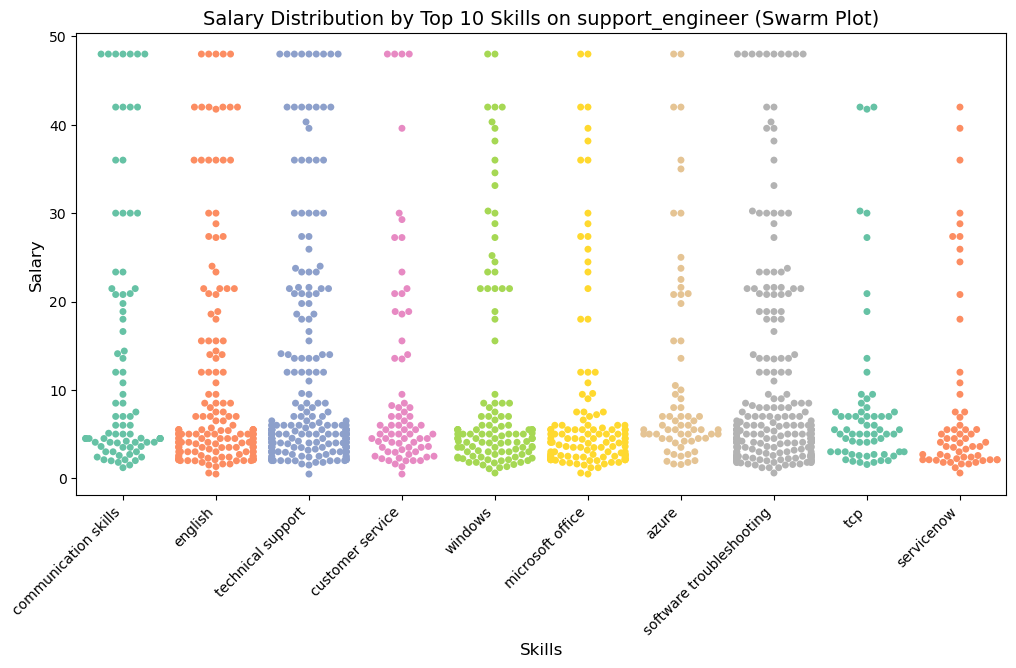

In [146]:
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.use_inf_as_na = True
plt.figure(figsize=(12, 6))
# sns.swarmplot(x='skills', y='salary_pa', data=df_top_skills, palette="Set2")
sns.swarmplot(x='skills', y='salary_lpa', data=df_top_skills,palette="Set2",hue="skills",legend=False)

plt.title(f"Salary Distribution by Top 10 Skills on {job} (Swarm Plot)", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

### Rating vs Salary

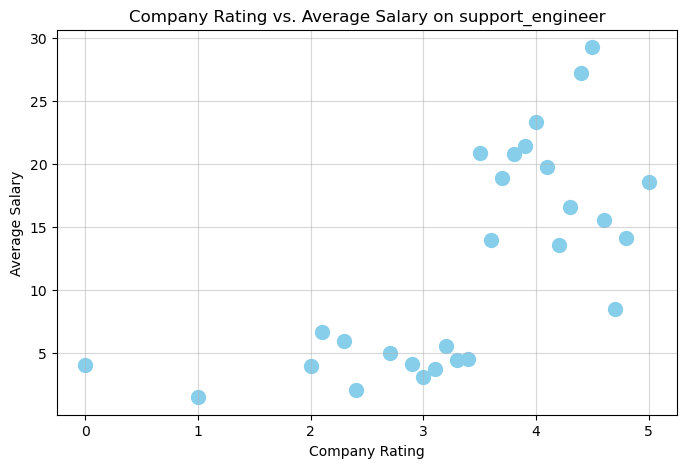

In [148]:
rating_avg_salary = df.groupby('company_rating')['salary_lpa'].mean()
# Step 1a: Map the. average salary to a diction
plt.figure(figsize=(8, 5))
plt.scatter(rating_avg_salary.index, rating_avg_salary.values, color='skyblue', s=100)
plt.title(f'Company Rating vs. Average Salary on {job}')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(alpha=0.5)
plt.show()


In [149]:
df_filtered = df[df['company_rating'] != 0]
correlation = df_filtered['company_rating'].corr(df_filtered['salary_lpa'])
correlation

0.28463343436107447